<a href="https://colab.research.google.com/github/Nicolaser1102/Introduccion_Machine_Learning/blob/main/Tareas_Week5/Ejercicio_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación: 3/2/2022
## Fecha de actualización: 3/2/2022
## Esteban Simbaña

#Ejercicio KNN







In [324]:
#Montamos el drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [325]:
#Importamos librerías para poder manejar mejor el df
import pandas as pd
import numpy as np

In [326]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week 1 - Track2/Deberes /Ejercicio KNN/abalone.data'

df = pd.read_csv(nombrearchivo)
df.head() #Mostramos df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#Limpieza de datos 

In [327]:
#observamos que no hay datos faltantes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [328]:
#nuestra base de datos está completa
df.isnull().sum() 

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

Ahora, se observa que los nombres de las columnas son en realidad parte de otra fila de datos

In [329]:
df.columns.values[0:9]

array(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'], dtype=object)

In [330]:
#Creación de un diccionario para anexarlo a nuestra df 
extra_fila = {'M':'M','0.455':0.455,'0.365':0.365,'0.095':0.095,'0.514':0.514,'0.2245':0.2245, '0.101': 0.101,'0.15':0.15,'15':15}
#Se anexa a la df / Nota: no olvidar el 'ignore_index = True' o arrojará error
df = df.append(extra_fila,ignore_index = True)
df.tail() 

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12
4176,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15


Efectivamente, nuestra última fila ya se encuentra en la df

Sin título3.png

In [331]:
#vemos la info de la df de nuevo para ver si no se cambiaron los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4177 non-null   object 
 1   0.455   4177 non-null   float64
 2   0.365   4177 non-null   float64
 3   0.095   4177 non-null   float64
 4   0.514   4177 non-null   float64
 5   0.2245  4177 non-null   float64
 6   0.101   4177 non-null   float64
 7   0.15    4177 non-null   float64
 8   15      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Todo está correcto con respecto a los valores.

Ahora, se cambian los valores de las columnas con respecto a los datos que se presentan en el documento de información sobre el df

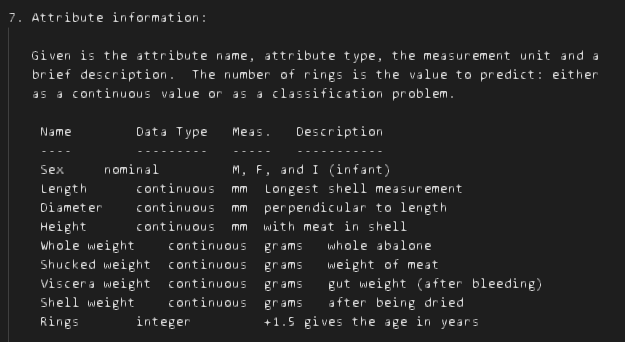

In [349]:
#creamos una lista con los nombres de columnas nuevos y reeemplazamos 
df.columns = ['Sexo','Largo (mm)','Diámetro (mm)','Ancho (mm)','Peso total (grs)', 'Peso de carne (grs)','Peso vísceras (grs)','Peso caparazón (grs)','N° Anillos']

In [350]:
df.head() #comprobamos los cambios

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Listo!

# Tarea
 - La primera tarea es utilizar el conjunto de datos del abulón para predecir la edad del abulón a partir de mediciones físicas utilizando KNN. Este es un problema de regresión. 

- La segunda tarea es utilizar el conjunto de datos de abulón para predecir el sexo a partir de sus características. 


## Tarea N° 1
- La primera tarea es utilizar el conjunto de datos del abulón para predecir la edad del abulón a partir de mediciones físicas utilizando KNN. Este es un problema de regresión. 

In [351]:
df.head()

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [352]:
#importamos librerias que necesitaremos 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

Division de datos entre las variables dependientes y la variable independiente (vector obetivo)

In [353]:
X = df.drop(['Sexo','N° Anillos'],axis =1) #variables dependientes
y = df['N° Anillos'] #variables independientes

Implementación algoritmo KKNN

Dividimos los datos en conjuntos de prueba y entrenamiento

In [354]:
X_ent, X_test, y_ent, y_test = train_test_split(X,y,test_size=0.20)

Ajustamos los parámetros knn

In [355]:
knn = KNeighborsRegressor(n_neighbors=10)

Entrenamos el modelo

In [356]:
knn.fit(X_ent,y_ent)

KNeighborsRegressor(n_neighbors=10)

Calificamos nuestro modelo

In [357]:
knn.score(X_test,y_test)

0.5248813783953927

El modelo tiene un 52% de probabilidad de acertar el número de anillos de un nuevo dato de abulón.

**Conclusiones: **
 - El modelo puede tener una métrica baja porque el algoritmo KNN funciona mejor en bases de datos pequeñas y con un menor número de variables.


## Tarea N° 2
- La segunda tarea es utilizar el conjunto de datos de abulón para predecir el sexo a partir de sus características. 

In [358]:
df.head() #tenemos la df completa

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Observamos que datos hay en la variable sexo

In [359]:
df["Sexo"].unique() #hay 3 variables

array(['M', 'F', 'I'], dtype=object)

En el documento guía expone que el valor de 'I' se refiere a infantes.

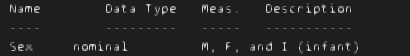

Por lo que se procederá a retirar los valores de 'I' en cada fila porque no representan algún sexo. 

In [360]:
#creamos un filtro 
infant_filter = df["Sexo"] != 'I'

#y lo aplicamos para crear una nueva df
df2 = df #creamos una nueva df para que no afecten los datos del anterior trabajo
df2 = df2.loc[infant_filter,:]

In [361]:
df2.head()

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


Ahora crearemos variables dummies para representar las variables "Sexo" pero en forma numérica para que sea más interpretable para nuestro algoritmo KNN

In [362]:
df2 = pd.get_dummies(df2,columns=["Sexo"], drop_first = True)

In [363]:
df2.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos,Sexo_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0


Ahora en nuestro df el Sexo es:
  - '1' Para sexo femenino 
  - '0' Para sexo masculino

In [364]:
#cambiamos el nombre de la columna
df2 = df2.rename(columns={'Sexo_M':'Sexo'})             

In [365]:
df2.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos,Sexo
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0


Ahora si podemos proceder a implementar el algoritmo KNN

Elegimos nuestras variables dependientes (X) y la variable independiente (y)

In [366]:
X = df2.drop(columns=('Sexo'))
X.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


In [367]:
y = df2["Sexo"]
y.head()

0    1
1    0
2    1
5    0
6    0
Name: Sexo, dtype: uint8

In [368]:
#importamos librería de knn de clasificación
from sklearn.neighbors import KNeighborsClassifier

Implementación algoritmo KNN

Dividimos los datos en conjuntos de prueba y entrenamiento

In [369]:
X_ent, X_test, y_ent, y_test = train_test_split(X,y,test_size=0.20)

Ajustamos los parámetros knn

In [370]:
knn2 = KNeighborsClassifier(n_neighbors=5)

Entrenamos el modelo

In [371]:
knn2.fit(X_ent,y_ent)

KNeighborsClassifier()

Puntuamos el modelo

In [372]:
knn2.score(X_test,y_test)

0.5537918871252204

El modelo tiene un 55% de probabilidad de acertar el número de anillos de un nuevo dato de abulón.

## **Una vez que hayas completado las dos tareas, responde las siguientes preguntas.**

- ¿Podrías haber utilizado la regresión lineal y la regresión KNN para resolver el problema de regresión?

Si, los dos algoritmos pueden funcionar para predecir nuevos valores en "y" pero cada uno puede ser útil para distintos tipos de datos en las variables dependientes en conjunto con su tamaño de dimensión.

- ¿Podrías haber utilizado la regresión lineal para el problema de clasificación?

Si, pero hubiera funcionado menos que al usar un algoritmo de clasificación ya que 'KNN' funciona mejor para variables categóricas.